https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [1]:
# pip install ipywidgets


In [2]:
# pip install tqdm

In [3]:
import csv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functools
from tqdm.notebook import tqdm

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
df = pd.read_csv('2915173.csv')


In [6]:
df

,STATION,NAME,DATE,TMAX,TMIN,TOBS
0,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-01-01,38,32.0,NaN
1,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-01-02,55,34.0,41.0
2,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-01-03,41,32.0,32.0
3,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-01-04,43,27.0,38.0
4,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-01-05,39,35.0,37.0
...,...,...,...,...,...,...
360,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-12-27,41,35.0,37.0
361,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-12-28,55,35.0,50.0
362,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-12-29,54,44.0,47.0
363,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-12-30,53,46.0,50.0


In [7]:
df = df.drop(columns=['TMAX', 'TMIN'])

In [8]:
df

,STATION,NAME,DATE,TOBS
0,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-01-01,NaN
1,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-01-02,41.0
2,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-01-03,32.0
3,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-01-04,38.0
4,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-01-05,37.0
...,...,...,...,...
360,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-12-27,37.0
361,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-12-28,50.0
362,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-12-29,47.0
363,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-12-30,50.0


In [9]:
df = df.bfill(axis ='rows')

In [10]:
df

,STATION,NAME,DATE,TOBS
0,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-01-01,41.0
1,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-01-02,41.0
2,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-01-03,32.0
3,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-01-04,38.0
4,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-01-05,37.0
...,...,...,...,...
360,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-12-27,37.0
361,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-12-28,50.0
362,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-12-29,47.0
363,USC00448084,"WEATHER FORECAST OFFICE STERLING, VA US",2021-12-30,50.0


In [11]:
freq = pd.Series(df.TOBS.values,index=df.index).to_dict()


In [12]:
freq

{0: 41.0,
 1: 41.0,
 2: 32.0,
 3: 38.0,
 4: 37.0,
 5: 38.0,
 6: 33.0,
 7: 32.0,
 8: 36.0,
 9: 24.0,
 10: 25.0,
 11: 27.0,
 12: 30.0,
 13: 35.0,
 14: 42.0,
 15: 35.0,
 16: 36.0,
 17: 34.0,
 18: 27.0,
 19: 23.0,
 20: 37.0,
 21: 37.0,
 22: 27.0,
 23: 32.0,
 24: 30.0,
 25: 35.0,
 26: 32.0,
 27: 25.0,
 28: 25.0,
 29: 30.0,
 30: 27.0,
 31: 32.0,
 32: 31.0,
 33: 32.0,
 34: 42.0,
 35: 30.0,
 36: 36.0,
 37: 27.0,
 38: 27.0,
 39: 36.0,
 40: 32.0,
 41: 30.0,
 42: 29.0,
 43: 26.0,
 44: 33.0,
 45: 34.0,
 46: 26.0,
 47: 27.0,
 48: 27.0,
 49: 30.0,
 50: 23.0,
 51: 30.0,
 52: 30.0,
 53: 37.0,
 54: 56.0,
 55: 36.0,
 56: 35.0,
 57: 41.0,
 58: 42.0,
 59: 37.0,
 60: 27.0,
 61: 47.0,
 62: 31.0,
 63: 34.0,
 64: 26.0,
 65: 26.0,
 66: 36.0,
 67: 46.0,
 68: 53.0,
 69: 62.0,
 70: 56.0,
 71: 47.0,
 72: 41.0,
 73: 41.0,
 74: 40.0,
 75: 46.0,
 76: 45.0,
 77: 36.0,
 78: 32.0,
 79: 39.0,
 80: 41.0,
 81: 56.0,
 82: 54.0,
 83: 63.0,
 84: 56.0,
 85: 56.0,
 86: 46.0,
 87: 38.0,
 88: 54.0,
 89: 47.0,
 90: 31.0,
 91: 35.0

In [13]:
len(freq)


365

In [14]:
X_train = np.asarray(list(freq.keys()))
Y_train = np.asarray(list(freq.values()))
print("Num samples", str(len(X_train)))


Num samples 365


In [15]:
maxY = np.max(Y_train)
nY_train = Y_train / np.max(Y_train)



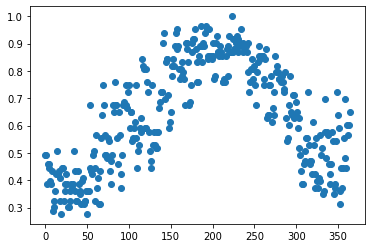

In [16]:
plt.scatter(X_train, nY_train)
plt.show()

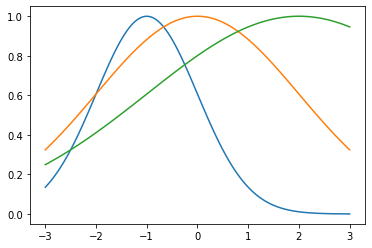

In [17]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
x_values = np.linspace(-3, 3, 120)
for mu, sig in [(-1, 1), (0, 2), (2, 3)]:
    plt.plot(x_values, gaussian(x_values, mu, sig))

plt.show()

In [18]:
learning_rate = 1.5
training_epochs = 5000

In [19]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [20]:
def model(X, mu, sig):
    return tf.exp(tf.div(tf.negative(tf.pow(tf.subtract(X, mu), 2.)), tf.multiply(2., tf.pow(sig, 2.))))

In [21]:
mu = tf.Variable(1., name="mu")
sig = tf.Variable(1., name="sig")
y_model = model(X, mu, sig)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [22]:
cost = tf.square(Y-y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2022-03-22 18:48:12.924616: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-22 18:48:12.926067: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [23]:
for epoch in range(training_epochs):
    for(x, y) in zip(X_train, nY_train):
        sess.run(train_op, feed_dict={X:x, Y:y})


In [24]:
mu_val = sess.run(mu)
sig_val = sess.run(sig)
print(mu_val)
print(sig_val)
sess.close()

201.16388
110.882126


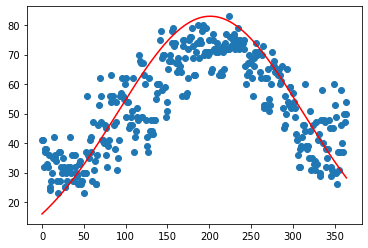

Prediction of day 301  55.78904047735309
Actual day 301 57.0


In [25]:
plt.scatter(X_train, Y_train)
trY2 = maxY * (np.exp(-np.power(X_train - mu_val, 2.) / (2 * np.power(sig_val, 2.))))
plt.plot(X_train, trY2, 'r')
plt.show()
print("Prediction of day 301 ", trY2[300])
print("Actual day 301", Y_train[300])

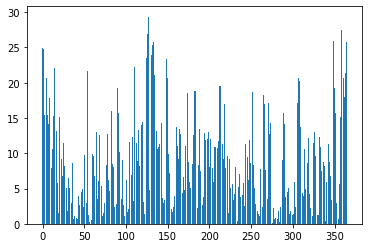

Average Error 3.5518208296484555
Accuracy 0.9572069779560427


In [26]:
# plot the error
error = np.power(np.power(trY2 - Y_train, 2), 0.5)
plt.bar(X_train, error)
plt.show()

# compute the overall average error
avg_error = functools.reduce(lambda a,b: a+b, (trY2-Y_train))
avg_error = np.abs(avg_error) / len(X_train)
print("Average Error", avg_error)
acc = 1. - (avg_error / maxY)
print("Accuracy", acc)